In [667]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import unittest
import pandas as pd
from tabulate import tabulate


In [668]:
def friedkin_johnsen(Lam,A,x0,k,plot_result = False) :
    n = A.shape[0] # assuming everything is dimensioned right
    I = np.eye(n)
    xx = np.zeros((n,k))
    xx[:,0] = x0
    for i in range(1,k) :
        xx[:,i] = Lam@A@xx[:,i-1] + (I-Lam)@x0
    if plot_result:
        plt.plot(xx.T)
    return xx 

def draw_from_matrix(A,draw_labels=False, drw_method='arc3, rad = 0.1') :
    G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
    layout = nx.spring_layout(G,seed=0)
    nx.draw(G, layout, node_size=750, with_labels=True, font_weight='bold', font_size=15, connectionstyle=f"{drw_method}")
    if draw_labels :
        labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(), edge_labels=labels, label_pos=.33);
        
def printPrettyMatrix(objStr, matrix):
    objStr+="\t\t["   
    for row in matrix:
        objStr+="["
        for col in row:
             objStr+=f" {col:.02f},"
        objStr= objStr[:-1]+"],"
        objStr+="\n \t\t"
    objStr=objStr[:-5]+"]" 
    return objStr  

# def timestepsToPTable(t_step_matrix):
#     print(t_step_matrix)
#     node_lst = [f"Node {node}" for node in range(len(t_step_matrix))]
#     print(node_lst)
#     for node in range(len(t_step_matrix)):
#         print(f"Node: {node}")
#         for t_stp in range(len(t_step_matrix[0])):
#             print(f"Time step {t_stp}: ", end="")
#             print(t_step_matrix[node][t_stp])

# def timestepsToPTable(t_step_matrix):
#     node_lst = [node for node in range(len(t_step_matrix))]
#     time_step_dict = {f"{node:02}" : [] for node in range(len(t_step_matrix))}

#     for t_stp in range(len(t_step_matrix[0])):
#         for node in range(len(t_step_matrix)):
#             time_step_dict.get(f"{node:02}").append(t_step_matrix[node][t_stp]) 

    
#     time_table = pd.DataFrame(time_step_dict, index=[f"t={t_stp}" for t_stp in range(len(t_step_matrix[0]))], columns=[f"{node:02}" for node in range(len(t_step_matrix))])
#     print(tabulate(time_table))

def timestepsToPTable(t_step_matrix):
    time_step_dict = {f"{tm_step:02}" : [] for tm_step in range(len(t_step_matrix[0]))}

    for node in range(len(t_step_matrix)):
        for tm_step in range(len(t_step_matrix[0])):
            time_step_dict.get(f"{tm_step:02}").append(t_step_matrix[tm_step][node]) 
    print(time_step_dict)
    
    time_table = pd.DataFrame(time_step_dict, index=[f"t={t_stp}" for t_stp in range(len(t_step_matrix[0]))], columns=[f"{node:02}" for node in range(len(t_step_matrix))])
    print(tabulate(time_table))

In [669]:
tstMatrix = [[0.0, 0.0, 0.0,],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0]]

timestepsToPTable(tstMatrix)

{'00': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], '01': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '02': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


ValueError: Shape of passed values is (11, 11), indices imply (3, 11)

Original Network:
		[[ 0.00, 0.90, 0.00, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.20, 0.10, 0.40, 0.30, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.90, 0.00, 0.10, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00],
 		[ 0.40, 0.00, 0.00, 0.20, 0.00, 0.00, 0.00, 0.40, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.80, 0.00, 0.10, 0.00, 0.00, 0.00, 0.10, 0.00]]


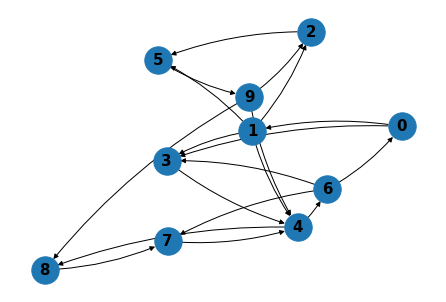

In [ ]:
# Adjacency matrix for the graph provided in project handout
proj_03_adj_ntwrk = [[0.0, 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                     [0.0, 0.0, 0.2, 0.1, 0.4, 0.3, 0.0, 0.0, 0.0, 0.0],
                     [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 
                     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0], 
                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 
                     [0.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0], 
                     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],  
                     [0.0, 0.0, 0.8, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0]]

print("Original Network:")
print(printPrettyMatrix("", proj_03_adj_ntwrk))

# Show that graph looks like the one for the project
draw_from_matrix(proj_03_adj_ntwrk)

New Network:
		[[ 0.00, 0.90, 0.00, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.20, 0.10, 0.40, 0.30, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.90, 0.00, 0.10, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00],
 		[ 0.40, 0.00, 0.00, 0.20, 0.00, 0.00, 0.00, 0.40, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.80, 0.00, 0.10, 0.00, 0.00, 0.00, 0.10, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00]]


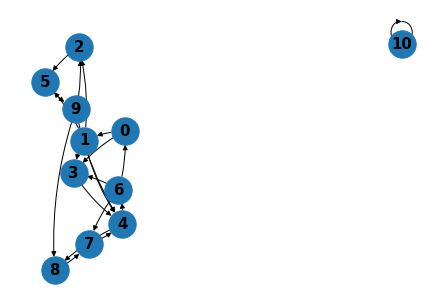

In [ ]:
def addNodeToNetwork(network):
    # Add new col to end of each row
    [network[row].append(0.0) for row in range(len(network))]
    network.append([0.0 for col in range(len(network)+1)])
    network[-1][-1] = 1.0
    return network
    
new_adj_matrix = addNodeToNetwork(proj_03_adj_ntwrk)
print("New Network:")
print(printPrettyMatrix("", new_adj_matrix))

draw_from_matrix(new_adj_matrix)

[[0.0, 0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.2, 0.1, 0.4, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.4, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]


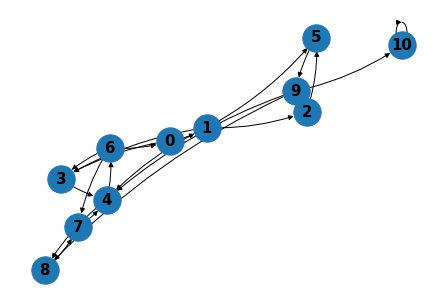

In [ ]:
def addBadEdgeToNetwork(network, node, bad_node):
    # Check if edge exsists 
    if network[node][bad_node] != 0.0:
        print("what now!!!!")
        print("Put in try block here")
    for edge in range(len(network[node])):
        network[node][edge] = network[node][edge] * 0.5
    network[node][bad_node] = 0.5
    return network

print(addBadEdgeToNetwork(new_adj_matrix, 9, 10))

draw_from_matrix(new_adj_matrix)

In [ ]:
# Initialize original opinions for each node 
og_node_opnins = [0.0 for rowNcol in range(len(new_adj_matrix))]
og_node_opnins[6] = 1.0

lambda_np_diag = np.diag(og_node_opnins)

lambda_diag = lambda_np_diag.tolist()

print("Adj. Matrix w/ 'bad' node")
print(printPrettyMatrix("", new_adj_matrix))
print("Original opinions")
print(printPrettyMatrix("", [og_node_opnins]))
print("Lambda Diag Matrix")
print(printPrettyMatrix("", lambda_np_diag))

Adj. Matrix w/ 'bad' node
		[[ 0.00, 0.90, 0.00, 0.10, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.20, 0.10, 0.40, 0.30, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.90, 0.00, 0.10, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00],
 		[ 0.40, 0.00, 0.00, 0.20, 0.00, 0.00, 0.00, 0.40, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00],
 		[ 0.00, 0.00, 0.40, 0.00, 0.05, 0.00, 0.00, 0.00, 0.05, 0.00, 0.50],
 		[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00]]
Original opinions
		[[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00]]
Lambda Diag Matrix
		[[ 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


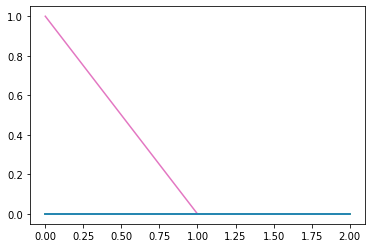

In [ ]:
result = friedkin_johnsen(np.array(lambda_diag), np.array(new_adj_matrix), np.array(og_node_opnins), 3, plot_result=True) # result is a pretty big vector, so we don't want to print it
print(result[:,-1])  # instead, just print the last one

In [ ]:
timestepsToPTable(result)


---  -  -  -  -  -  -  -  -  -  -  -
t=0  0  0  0  0  0  0  1  0  0  0  0
t=1  0  0  0  0  0  0  0  0  0  0  0
t=2  0  0  0  0  0  0  0  0  0  0  0
---  -  -  -  -  -  -  -  -  -  -  -
